# Image classification model with TensorFlow

[Online Tutorial](<https://keras.io/examples/vision/image_classification_from_scratch/>)

## Install packages and libraries

In [1]:
!pip install tensorflow

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30703 sha256=5520c070920d67a17d8877641748c9b0c298b91b1c1189cfca9e873bc2a9a97c
  Stored in directory: c:\users\guill\appdata\local\pip\cache\wheels\98\91\04\971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=b3e2467db661d0be9f49318603da372df3e2cfef0a913a84dd327faac4116417
  Stored in directory: c:\users\guill\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built clang termcolor
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled s

In [34]:
!pip install opencv-python

In [26]:
!pip install pydot

In [ ]:
graphviz

In [4]:
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


## Loading packages

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tqdm

## Download and open the file

When copying from a tutorial, make sure you copy the entire cell.  For this best copy from left to right and check the results, including in your local folder, to see that files downloaded correctly.

In [6]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 11  786M   11 88.6M    0     0  88.6M      0  0:00:08 --:--:--  0:00:08 92.9M
 23  786M   23  187M    0     0   187M      0  0:00:04  0:00:01  0:00:03 95.8M
 36  786M   36  290M    0     0   145M      0  0:00:05  0:00:02  0:00:03 98.4M
 50  786M   50  396M    0     0   132M      0  0:00:05  0:00:03  0:00:02  100M
 63  786M   63  500M    0     0   125M      0  0:00:06  0:00:04  0:00:02  101M
 76  786M   76  602M    0     0   120M      0  0:00:06  0:00:05  0:00:01  102M
 89  786M   89  705M    0     0   117M      0  0:00:06  0:00:06 --:--:--  103M
 93  786M   93  733M    0     0  91.6M      0  0:00:08  0:00:08 --:--:-- 76.5M
 93  786M   93  737M    0     0  81.9M      0  0:00:09  0:00:09 --:--:-- 60.4M
 99  786M   99  786M    0     0  87.3M      0  0:00

## Mac version

In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

## Windows version

In [2]:
# test if directory exist
# use subprocess or zipfile package in pure python
# we can add a flag to see the progress with verbose option
dirToTest = "PetImages"
if os.path.isdir(dirToTest) == False :
    !tar.exe -xf kagglecatsanddogs_3367a.zip 
else:
    !tar.exe -rf kagglecatsanddogs_3367a.zip

!dir

tar.exe: no files or directories specified


 Le volume dans le lecteur C s'appelle Windows
 Le num‚ro de s‚rie du volume est FCD9-2FC0

 R‚pertoire de C:\Users\guill\Desktop

16/10/2021  16:42    <DIR>          .
16/10/2021  16:42    <DIR>          ..
16/10/2021  15:30    <DIR>          .ipynb_checkpoints
27/03/2021  18:08    <DIR>          AdventOfCode
08/12/2020  06:15           170ÿ215 AdventOfCode.zip
11/07/2021  17:26             2ÿ251 Anaconda Navigator (anaconda3).lnk
04/09/2021  16:19             2ÿ902 Anaconda Prompt (Project1).lnk
09/10/2019  12:48             2ÿ198 Cisco Webex Meetings.lnk
16/10/2021  16:42         1ÿ105ÿ637 Classification_tutorial.ipynb
12/10/2021  11:07    <DIR>          cours
28/09/2020  19:23               260 Diabotical.url
24/09/2021  19:49             2ÿ147 Docker Desktop.lnk
27/09/2021  14:41               108 g.txt
28/09/2021  17:48    <DIR>          GH
16/10/2021  09:47             2ÿ378 GitHub Desktop.lnk
11/09/2021  21:25             2ÿ299 Jupyter Notebook (Project1).lnk
01/04/2021  16:19 

Check to see the folders unzipped correctly.  Here we have two folders labelled 'Cats' and 'Dogs', which are the classes we will be using to classify

## Filter out corrupted images

When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header.

In [3]:
def getSubDirs(inputDir): #Function that gives the list of subdirectories

    rClasseList =[] #Empty list of subdirectories

    for fname in os.listdir(inputDir): #Go over all elements in the directory
        fpath = os.path.join(inputDir, fname) #Create full path to each element
        if os.path.isdir(fpath): #Check if it is a directory or not.
            rClasseList.append(fname) #If it is a directory add it to the list

    return rClasseList

In [4]:
getSubDirs ("./PetImages")

['Cat', 'Dog']

We have two categories Cat and Dog

In [5]:
def count_files (inputDir):
    classes = getSubDirs (inputDir)
    
    for folder_name in classes: #look through folders that have the names of classes
        folder_path = os.path.join(inputDir, folder_name) 
        path, dirs, files = next(os.walk(folder_path))
        file_count = len(files)
        # print (folder_name, 'contains ', file_count, ' files') #This is one way to do it
        print (f'{folder_name} contains {file_count} files') #This another.
    

In [6]:
count_files ("./PetImages")

Cat contains 11749 files
Dog contains 11675 files


## delete_corrupt files (function)

In [7]:
def delete_corrupt (input_dir):
    classes= getSubDirs (input_dir)
    print (classes)
    num_skipped = 0  #defines the counter of photos deleted
    
    for folder_name in tqdm.tqdm(classes) :  #look through folders that have the names of classes
        folder_path = os.path.join(input_dir, folder_name) #it creates folderpath for classes in the given folder
        for fname in os.listdir(folder_path): # fnmane is just the "counter" or local variable (like an i).
            #This line will combine the file name to the directory path.  The "glob2" lists files and folders etc.
            fpath = os.path.join(folder_path, fname) #Combines folder path and file name
            try:
                fobj = open(fpath, "rb") #Opens file.  The "rb" command opens the file in binary mode. Use this with images.
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10) #Look at the first ten bytes of the fiel,
                                                                        #where the marker is to be found
            finally:
                fobj.close()

            if not is_jfif:
                num_skipped += 1
                # Delete corrupted image
                os.remove(fpath)

    print("Deleted %d images" % num_skipped)
    

[Check this for more information](https://stackoverflow.com/questions/62220855/tensorflow-removing-jfif)

In [13]:
delete_corrupt ('./PetImages')

['Cat', 'Dog']


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:24<00:00, 12.30s/it]

Deleted 1578 images


In [8]:
count_files ("./PetImages")

Cat contains 11749 files
Dog contains 11675 files


## Generate the Dataset

In [9]:
def generateDataset (pInputDir, pValidation_split, pImage_size, pBatch_size):
    """
        pInputDir : input directorywhere the subdirs are presents
        pValidation_split : validation_split param 0.x format
        pImage_size : image_size param (x,y) format
        pBatch_size : batch_size param , set of images
    """
   
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        pInputDir,
        validation_split=pValidation_split,
        subset="training",
        seed=1337,
        image_size=pImage_size,
        batch_size=pBatch_size,
    )
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        pInputDir,
        validation_split=pValidation_split,
        subset="validation",
        seed=1337,
        image_size=pImage_size,
        batch_size=pBatch_size,
    )
    
    return train_ds, val_ds

## test the dataset generation

In [10]:
image_size = (180, 180)
batch_size = 32
inputDir="PetImages"
validation_split=0.2

to_train_ds, validation_ds = generateDataset (inputDir,validation_split, image_size, batch_size  )

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


## print out 1st element into to_train_ds (Training Set)

In [11]:
for element in to_train_ds:
    # show 1 element
    print(element)
    # show the tensor part of the 1st element element
    print("Tensor of 1st element \n" , element[0].shape)
    
    # do not iterate over the full dataset it is too big
    break

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[160.11111  , 155.11111  , 126.111115 ],
         [159.33333  , 154.33333  , 125.333336 ],
         [158.74692  , 153.74692  , 124.74692  ],
         ...,
         [158.43056  , 150.43056  , 127.43056  ],
         [155.76387  , 148.4305   , 125.09718  ],
         [156.43056  , 150.43056  , 126.43056  ]],

        [[161.       , 156.       , 127.       ],
         [160.09721  , 155.09721  , 126.09722  ],
         [159.       , 154.       , 125.       ],
         ...,
         [160.29167  , 152.29167  , 129.29167  ],
         [157.19446  , 149.86108  , 126.52776  ],
         [157.       , 151.       , 127.       ]],

        [[162.       , 157.       , 128.       ],
         [161.       , 156.       , 127.       ],
         [160.       , 155.       , 126.       ],
         ...,
         [161.47067  , 153.47067  , 130.47067  ],
         [158.56483  , 151.23146  , 127.89815  ],
         [158.       , 152.       , 128.    

## show first image of the batch of 32

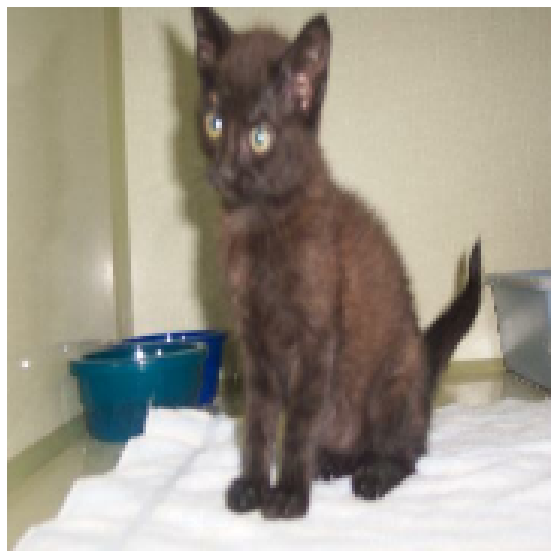

In [12]:

# display image
plt.figure(figsize=(10, 10))  # image size
plt.axis("off")               # remove axis
plt.imshow(element[0][0].numpy().astype("uint8"))  #need to convert to int unsigned integer 8 

## try with  .take


In [13]:
## show more image sin a for loop

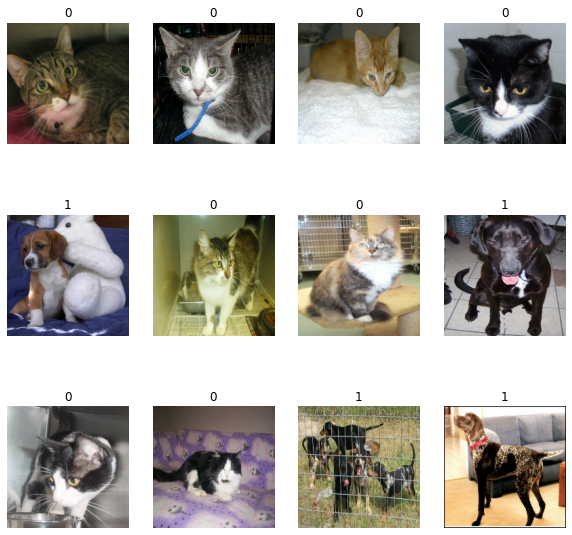

In [14]:
# choose output size of the display here
plt.figure(figsize=(10, 10))
# loop into to_train_ds to take x images, here 9
for images, labels in to_train_ds.take(1):
    for i in range(12):
        # show images on X rows , Y columns, i+1 is index images from 1 to x
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert image in uint8
        plt.title(int(labels[i])) # show class where an image belong
        # class comes from subdir structure "Cat", "Dog" => class 0, class1
        plt.axis("off")

When many animals are present, how the choice is made between the different classes ?
Try to find 2 dogs, 2 cats, Dogs and cats , more dogs than cats
already test : 2 cats  => cat

## Augment data
When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down overfitting.


In [15]:
def define_SequentialTransformation(pFlipOrientation, pRotationvalue):
    """
        pFlipOrientation : provide an orientation param in "horizontal", "vertical", "horizontal_and_vertical".
        pRotationvalue : provide a value for factor of layers.RandomRotation function
        return the keras.sequential object
    """

    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip(pFlipOrientation),
            layers.RandomRotation(pRotationvalue),
        ]
    )
    
    return data_augmentation


We are in a sequential model, it is a composition of transformations : 1st  RandomFlip, 2nd RandomRotation
"yet realistic transformations" drive the choice of transformations

In [16]:
def show_transformation(img_data_augmentation):

    plt.figure(figsize=(10, 10))
    # retreive images  but there are 2 parts in to_train_ds.take(x) 
    # we discard the second element. the _ is necessary to execute the function but we are not interested in it
    for images, _ in to_train_ds.take(1):
        for i in range(12):
            augmented_images = img_data_augmentation(images)
            ax = plt.subplot(3, 4, i + 1)
            plt.imshow(augmented_images[0].numpy().astype("uint8"))
            plt.axis("off")

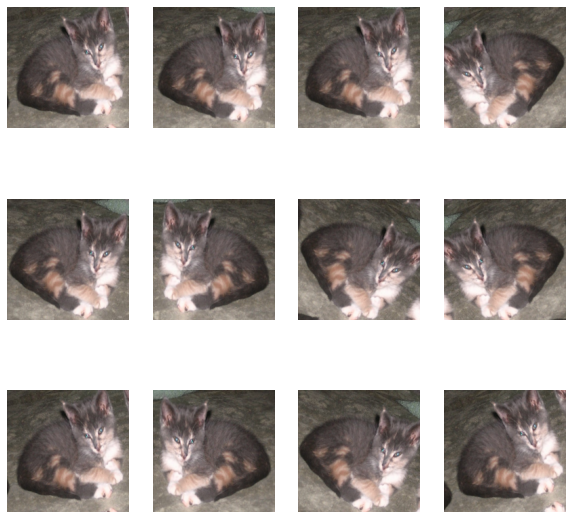

In [17]:
image_data_augmentation = define_SequentialTransformation("horizontal", 0.1)

show_transformation(image_data_augmentation)

# Standardizing the data 
Our image are already in a standard size (180x180), as they are being yielded as contiguous float32 batches by our dataset. However, their RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer at the start of our model.

In [18]:
# create a shape to include the channels numbers to image_size =(180,180) as dimension 
input_shape = (image_size[0],image_size[1],3)

# create a keras input with this input_shape
inputs= keras.Input(shape=input_shape)

# apply data_augmentation to this input
x = data_augmentation(inputs)

# add a layer of rescaling to standardize size between 0 and 1
x = layers.Rescaling(1./255)(x)


NameError: name 'data_augmentation' is not defined

# Definning the model

In [21]:
def make_model(input_shape, num_classes):
    #recover the data from the arguments . The batchsize is not included in the shape size.
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    # 
    data_augmentation = define_SequentialTransformation(pFlipOrientation = 'horizontal', pRotationvalue = 0.1)
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x) #normalize the data's values between 0 and 1.
    #conv layer with 32 filters of size 3 and stride 2. 
    #With the padding we are making sure that the input and the output are of the same dimentions.
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x) 
    x = layers.BatchNormalization()(x)
    
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    #the relu is a non-linear function setting the negatives values to 0. 
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual
    
    # There is four blocks of convolutions with a growing number of filters.
    for size in [128, 256, 512, 728]:
        
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    # select the average on the previous layer for each channel. 
    x = layers.GlobalAveragePooling2D()(x)
    
    #for a 2 classes classification , we use binary crossentropy and sigmoid activation function.
    #for a binary problem we can use only one neuron with a sigmoid function.
    #for more than 2 classes we need one neuron by class/label. Sigmoid function is not recommended in this case.
    #when using softmax we need to format the labels with :
    # sigmoid : cat : 0 ; dog : 1
    # softmax : cat : [1,0] ; dog : [0,1]
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
#keras.utils.plot_model(model, show_shapes=True)


## Link of a gif illustrating the convolution with stride
[Convolution with stride](https://www.google.com/search?q=stride+gif+convolution&sxsrf=AOaemvJkYWpwT8QZZdkMQT6TH0a9VNyLAw:1634391673701&tbm=isch&source=iu&ictx=1&fir=OwdHQO-SeJbqQM%252CmW-eK3FIZv0R8M%252C_%253Bwi-atMRVonY_uM%252CC3_dh-fpK6wbvM%252C_%253BntFXG-fB85XcnM%252CJUNgCeF3Rv7jwM%252C_%253BUdGxtc6rQZtuVM%252C4QXvJnomiBz9GM%252C_%253B9goRpmDjuUk_BM%252CkMg77aeTF8waeM%252C_%253BTAraETo8TW_gSM%252CZwI4U4UXM9XokM%252C_%253BfIpBmghT0dDlkM%252C5ijVZjPIGfUYcM%252C_%253BnjsCFb64MfESZM%252CIfIQO1GNpwfGQM%252C_&vet=1&usg=AI4_-kQRV7cPxWsDM52mBImeHfFaLMHtNQ&sa=X&ved=2ahUKEwjZu4m5h8_zAhWqxoUKHRfwD80Q9QF6BAgHEAE&biw=1664&bih=800&dpr=2#imgrc=OwdHQO-SeJbqQM)

## reference of the Global average pooling 2D
[Global average pooling 2D](https://paperswithcode.com/method/global-average-pooling)

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 180, 180, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 180, 180, 3)  0           sequential_2[0][0]               
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 90, 90, 32)   896         rescaling_1[0][0]                
____________________________________________________________________________________________

In [25]:
#One epoch is when the model is trained on all data point of the dataset.
#One step is the training on one batch.
epochs = 5

#
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    to_train_ds, epochs=epochs, callbacks=callbacks, validation_data=validation_ds,
)


Epoch 1/5
 83/586 [===>..........................] - ETA: 49:06 - loss: 0.7454 - accuracy: 0.5870

KeyboardInterrupt: 

## Model Prediction

In [40]:
# the model input shape must be (batch size, image height, image width, channels)
image = plt.imread("C:/Users/guill/Desktop/PetImages/Cat/0.jpg")


In [37]:
#Step1
# the image need to be resized to 180,180,3
image.shape
image_step1 = cv2.resize(image,(180,180))

In [38]:
#Step2
# the image must be reshape, to be of shape 1,180,180,3
image_step2=np.expand_dims(image_step1,axis=0)

In [39]:
model.predict(image_step2)

array([[0.46359786]], dtype=float32)